In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    

In [5]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['price']=california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


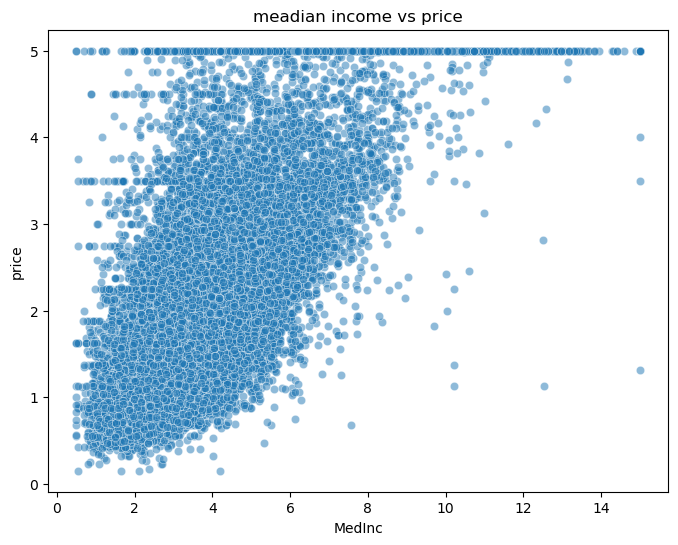

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='price',data=df,alpha=0.5)

plt.title("meadian income vs price")
plt.show()

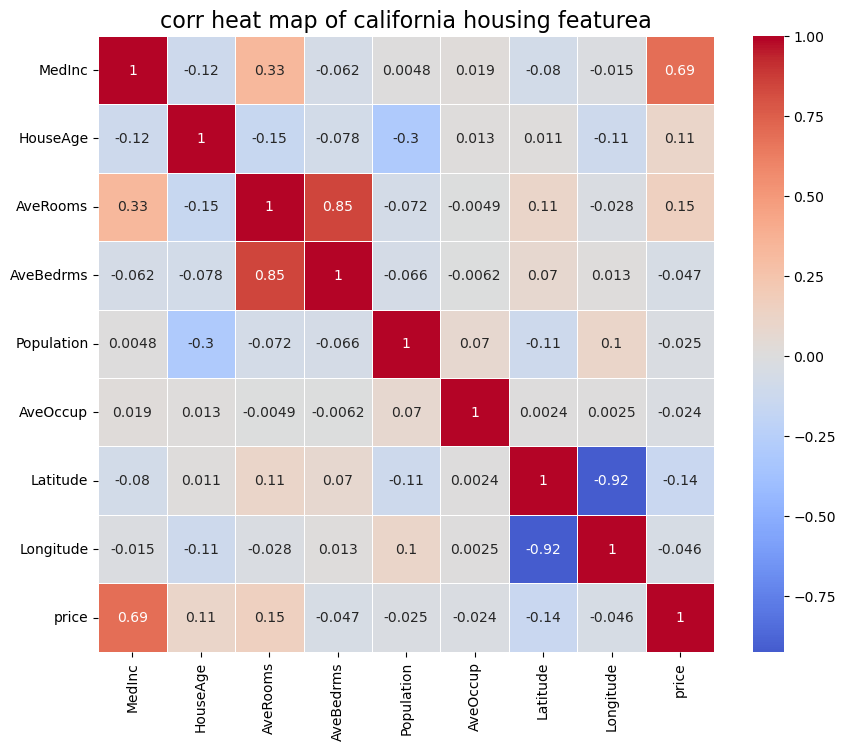

In [16]:
corr_martrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_martrix,annot=True,cmap='coolwarm',center=0,square=True,linewidth=0.5)
plt.title("corr heat map of california housing featurea",fontsize=16)
plt.show()

In [26]:
x=df[['MedInc']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)
print(f"\nLinear equation: price = {model.coef_[0]:.2f} * medInc + {model.intercept_:.2f}")



Linear equation: price = 0.42 * medInc + 0.44


In [30]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE: {mae:.2f} $100k")
print(f"\nRMsE: {rmse:.2f} $100k")
print(f"\nR2: {r2:.2f}")


MAE: 0.63 $100k

RMsE: 0.84 $100k

R2: 0.46


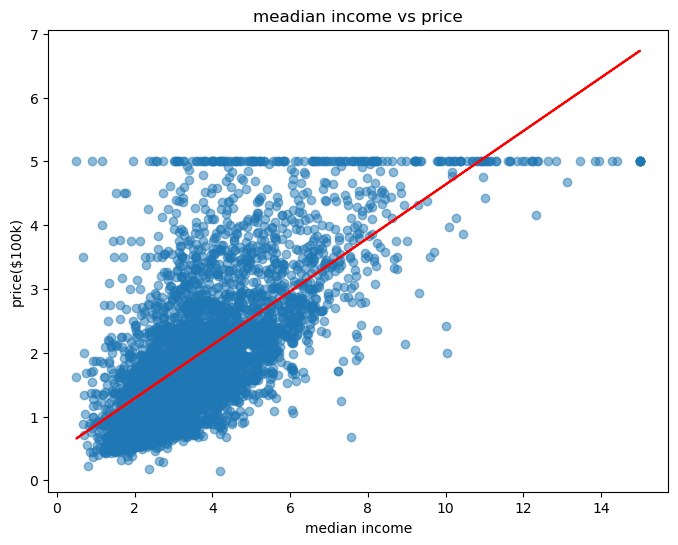

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,label='actual',alpha=0.5)
plt.plot(x_test,y_pred,color='red',label='Regression Line')
plt.title('meadian income vs price')
plt.xlabel('median income')
plt.ylabel('price($100k)')
plt.show()

In [35]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print("cross validation scores:",scores )

print("Average scores:",scores.mean())

cross validation scores: [0.45885919 0.48166967 0.46999743 0.49117562 0.46430473]
Average scores: 0.4732013270481831
